
# Build a Multilayer Convolutional using Keras¶


pip install keras



In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Reshape, Dropout, normalization
from keras.models import Model
from keras import optimizers
from datetime import datetime


input_img= Input(shape=(28,28,1))  # adapt this if using `channels_first` image data format

#x=normalization.BatchNormalization()(x)
h = Conv2D(32, (5, 5), activation='relu', padding='same')(input_img)
h = MaxPooling2D((2, 2), padding='same')(h)
h = Conv2D(64, (5, 5), activation='relu', padding='same')(h)
h = MaxPooling2D((2, 2), padding='same')(h)
h = Dropout(0.5)(h)
h = Reshape((int(h.shape[1]*h.shape[2]*h.shape[3]),))(h)
h = Dense(1024, activation='relu')(h)
h = Dense(10, activation='softmax')(h)

CNN = Model(input_img, h)
sgd = optimizers.SGD(lr=0.005, decay=1e-6, momentum=0.9, nesterov=True)
CNN.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

Using TensorFlow backend.


# download the data


In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Train the model

In [6]:
import numpy as np

x=np.zeros((mnist.train.images.shape[0], mnist.train.images.shape[1], 1))
x[:,:,0]=mnist.train.images

x=np.reshape(x,(55000,28,28,1))
x=x[1:10000,:,:,:]

xval=np.zeros((mnist.validation.images.shape[0], mnist.validation.images.shape[1], 1))
print(xval.shape)
xval[:,:,0]=mnist.validation.images
print(xval.shape)
X_val=np.reshape(xval,(5000,28,28,1))

y_true_val=mnist.validation.labels

y_true=mnist.train.labels[1:10000,:]


start=datetime.now()
history=CNN.fit(x, y_true, epochs=10, batch_size=100, shuffle=True, validation_data=(X_val, y_true_val))
time_r=datetime.now()-start

(5000, 784, 1)
(5000, 784, 1)
Train on 9999 samples, validate on 5000 samples
Epoch 1/10
9999/9999 [==============================] - 89s - loss: 2.2270 - acc: 0.2431 - val_loss: 2.0700 - val_acc: 0.5834
Epoch 2/10
9999/9999 [==============================] - 79s - loss: 1.6442 - acc: 0.5793 - val_loss: 0.8642 - val_acc: 0.7940
Epoch 3/10
9999/9999 [==============================] - 76s - loss: 0.7973 - acc: 0.7546 - val_loss: 0.4510 - val_acc: 0.8826
Epoch 4/10
9999/9999 [==============================] - 70s - loss: 0.5509 - acc: 0.8364 - val_loss: 0.3623 - val_acc: 0.9006
Epoch 5/10
9999/9999 [==============================] - 78s - loss: 0.4517 - acc: 0.8616 - val_loss: 0.3021 - val_acc: 0.9172
Epoch 6/10
9999/9999 [==============================] - 75s - loss: 0.3943 - acc: 0.8814 - val_loss: 0.2764 - val_acc: 0.9232
Epoch 7/10
9999/9999 [==============================] - 77s - loss: 0.3500 - acc: 0.8920 - val_loss: 0.2395 - val_acc: 0.9324
Epoch 8/10
9999/9999 [==================

## Evaluate the model

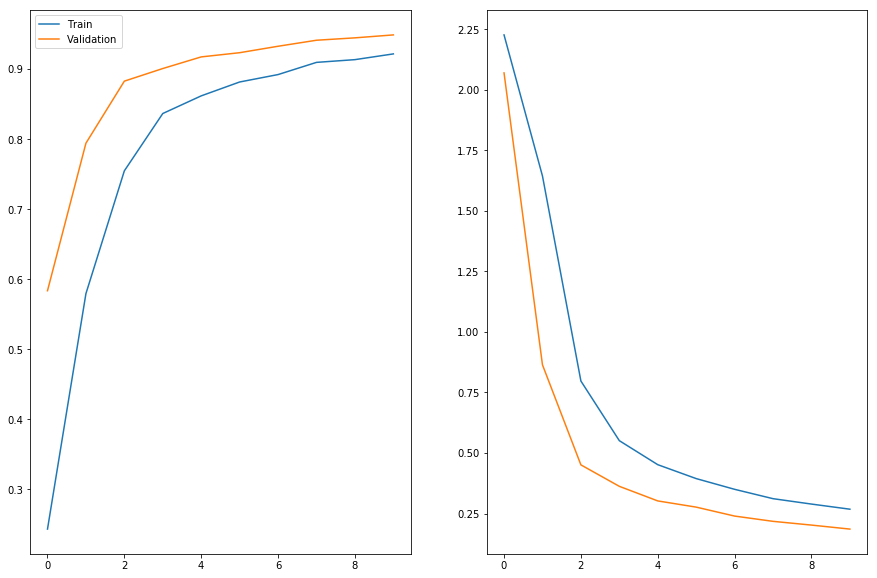

(10000, 784, 1)
(10000, 784, 1)
Train accuracy= 0.921492150568
Validation accuracy= 0.948600002527
Test accuracy= 94.81
Training time 0:11:46.726733


In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.subplot(121)
plt.plot(history.history['acc'], label='Train')
plt.plot(history.history['val_acc'], label='Validation')
plt.legend()
plt.subplot(122)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.show()


def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])



xtest=np.zeros((mnist.test.images.shape[0], mnist.test.images.shape[1], 1))
print(xtest.shape)
xtest[:,:,0]=mnist.test.images
print(xtest.shape)
xTest=np.reshape(xtest,(10000,28,28,1))

y_true_test=mnist.test.labels


y_pred = CNN.predict(xTest)

accTest=accuracy(y_pred, y_true_test)

print('Train accuracy=', history.history['acc'][-1])
print('Validation accuracy=', history.history['val_acc'][-1])

print('Test accuracy=', accTest)
print('Training time', time_r)



# Aditional information


# Recurrent neural networks

<img src=https://i.stack.imgur.com/KmrmP.png>

<img src=https://deeplearning4j.org/img/greff_lstm_diagram.png>